In [1]:
%pip install human-learn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.5/116.5 KB 508.0 kB/s eta 0:00:00 kB/s eta 0:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 1.8 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 371.6 kB/s eta 0:00:00m eta 0:00:010:00:02
Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd

from hulearn.datasets import load_titanic
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="hulearn.datasets")



/home/ali/.local/lib/python3.10/site-packages/hulearn/datasets.py:2: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_filename


In [5]:
df = load_titanic(as_frame=True)
X, y =df.drop(columns=['survived']), df['survived']

In [6]:
df.head()

survived  pclass                                               name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   

      sex   age     fare  sibsp  parch  
0    male  22.0   7.2500      1      0  
1  female  38.0  71.2833      1      0  
2  female  26.0   7.9250      0      0  
3  female  35.0  53.1000      1      0  
4    male  35.0   8.0500      0      0

In [7]:
def fare_based(dataf, threshold=10):
    return np.array(dataf['fare'] > threshold).astype(int)

In [8]:
from hulearn.classification import FunctionClassifier

mod = FunctionClassifier(fare_based, threshold=10)

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, accuracy_score, make_scorer

def fare_based(dataf, threshold=10):
    return np.array(dataf['fare'] > threshold).astype(int)

# Pay attention here, we set the threshold argument in here.
mod = FunctionClassifier(fare_based, threshold=10)

# The GridSearch object can now "grid-search" over this argument.
# We also add a bunch of metrics to our approach so we can measure.
grid = GridSearchCV(mod,
                    cv=2,
                    param_grid={'threshold': np.linspace(0, 100, 30)},
                    scoring={'accuracy': make_scorer(accuracy_score),
                             'precision': make_scorer(precision_score),
                             'recall': make_scorer(recall_score)},
                    refit='accuracy')
grid.fit(X, y);

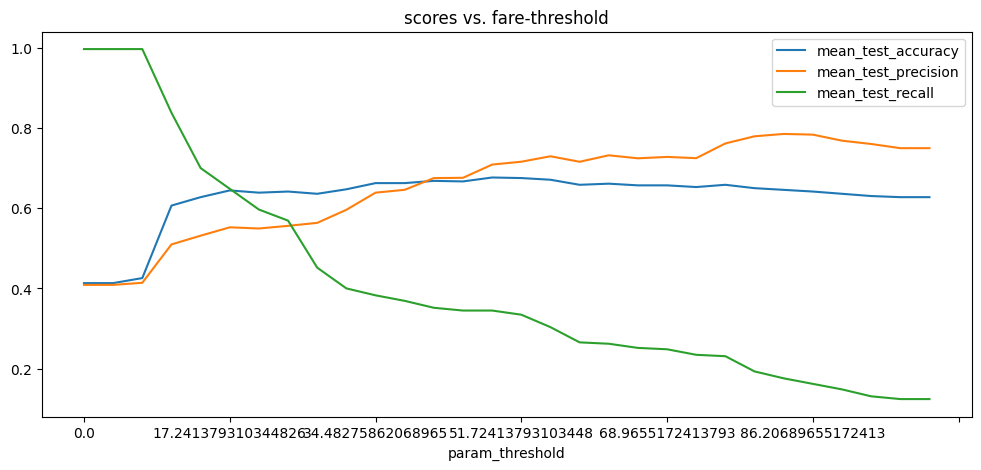

In [10]:
import pandas as pd

score_df = (pd.DataFrame(grid.cv_results_)
  .set_index('param_threshold')
  [['mean_test_accuracy', 'mean_test_precision', 'mean_test_recall']])

score_df.plot(figsize=(12, 5), title="scores vs. fare-threshold");

In [13]:
import numpy as np
from hulearn.outlier import InteractiveOutlierDetector
from hulearn.classification import FunctionClassifier, InteractiveClassifier

outlier    = WhatEverOutlier().fit(X, y)
classifier = WhatEverClassifier().fit(X, y)


def make_decision(dataf, threshold=0.8):
    # First we create a resulting array with all the predictions
    res = classifier.predict(dataf)

    # If we detect doubt, "classify" it as a fallback instead.
    proba = classifier.predict_proba(dataf)
    res = np.where(proba.max(axis=1) < threshold, "doubt_fallback", res)

    # If we detect an ourier, we'll fallback too.
    res = np.where(outlier.predict(dataf) == -1, "outlier_fallback", res)

    # This `res` array contains the output of the drawn diagram.
    return res

    fallback_model = FunctionClassifier(make_decision, threshold=0.8)

NameError: name 'WhatEverOutlier' is not defined

In [14]:
from sklego.datasets import load_penguins
from hulearn.experimental.interactive import InteractiveCharts

df = load_penguins(as_frame=True).dropna()
clf = InteractiveCharts(df, labels="species")

AttributeError: module 'numpy' has no attribute 'bool8'

In [15]:
clf.add_chart(x="bill_length_mm", y="bill_depth_mm", legend=False)

NameError: name 'clf' is not defined

In [16]:
clf.add_chart(x="flipper_length_mm", y="body_mass_g")

NameError: name 'clf' is not defined

In [17]:
from hulearn.classification import InteractiveClassifier

model = InteractiveClassifier(json_desc=clf.data())"

SyntaxError: unterminated string literal (detected at line 3) (1242892338.py, line 3)

In [18]:
X, y = df.drop(columns=['species']), df['species']

preds = model.fit(X, y).predict_proba(X)

KeyError: "['species'] not found in axis"

KeyError: 'bill_length_mm'

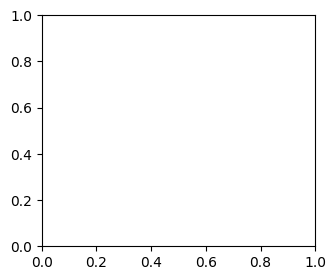

In [19]:
import matplotlib.pylab as plt

plt.figure(figsize=(12, 3))
for i in range(3):
    plt.subplot(131 + i)
    plt.scatter(X['bill_length_mm'], X['bill_depth_mm'], c=preds[:, i])
    plt.xlabel('bill_length_mm')
    plt.ylabel('bill_depth_mm')
    plt.title(model.classes_[i])

KeyError: 'flipper_length_mm'

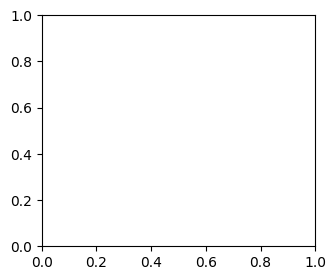

In [20]:
plt.figure(figsize=(12, 3))
for i in range(3):
    plt.subplot(131 + i)
    plt.scatter(X['flipper_length_mm'], X['body_mass_g'], c=preds[:, i])
    plt.xlabel('flipper_length_mm')
    plt.ylabel('body_mass_g')
    plt.title(model.classes_[i])

In [21]:
from hulearn.experimental.interactive import InteractiveCharts

# Note that the `labels` arugment here is a list, not a string! This
# tells the tool that we want to be able to add custom groups that are
# not defined by a column in the dataframe.
charts = InteractiveCharts(df, labels=['group_one', 'group_two'])

AttributeError: module 'numpy' has no attribute 'bool8'

In [22]:
%pip install human-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [23]:
charts.add_chart(x="flipper_length_mm", y="body_mass_g")

NameError: name 'charts' is not defined

In [24]:
from hulearn.preprocessing import InteractivePreprocessor
tfm = InteractivePreprocessor(json_desc=charts.data())

NameError: name 'charts' is not defined

In [25]:
# The flow for pandas
df.pipe(tfm.pandas_pipe).head()

NameError: name 'tfm' is not defined

In [26]:
# The flow for scikit-learn
tfm.fit(df).transform(df)[:5]

NameError: name 'tfm' is not defined